Importing necessary Libraries

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from Denoising import *

Creating randomised data as input signal

In [3]:
t=np.linspace(0,10,500)
data=np.sin(t)
data[90]=0.5
data[95]=-1
data[100]=1.5

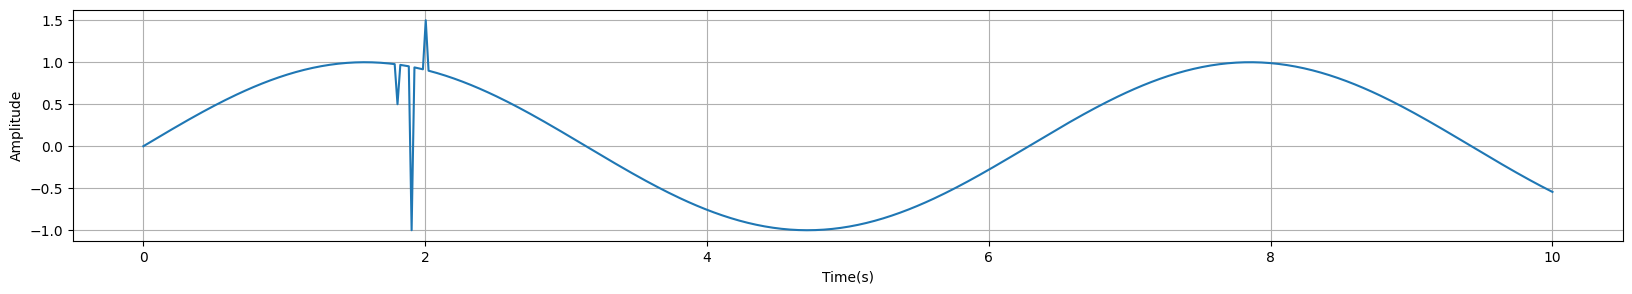

In [23]:
fig=plt.figure(figsize=(20,3))
plt.plot(t,data)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

Savitzky-Golay filter

In [8]:
print(savgol.__doc__)

Savitsky-Golay filter used to denoise any discrete time series data
    
    Parameters:
    ----------
    data : input amplitude of discrete time-series data
    m    : odd-number; signifies the number of convolution coefficients used
    
    Returns:
    -------
    y : Denoised data
    


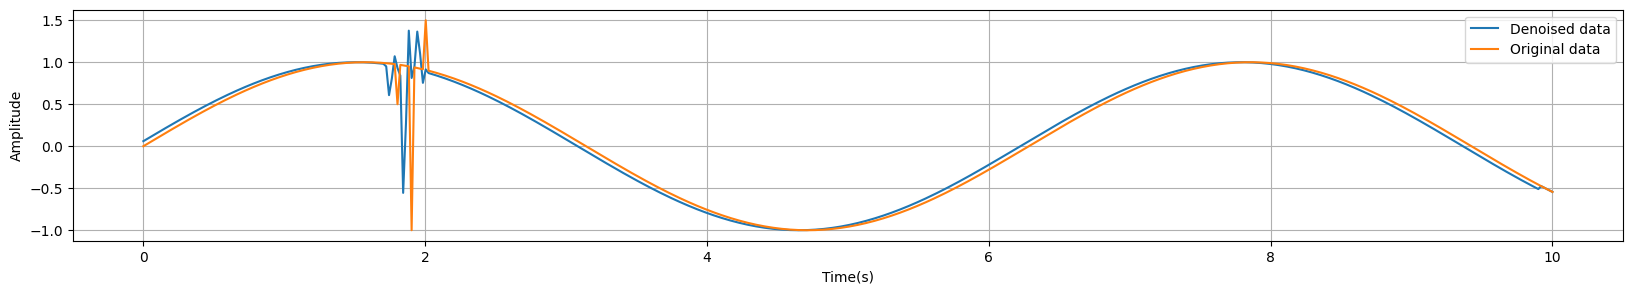

In [22]:
fig=plt.figure(figsize=(20,3))
plt.plot(t,savgol(data,5),label='Denoised data')
plt.plot(t,data,label='Original data')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

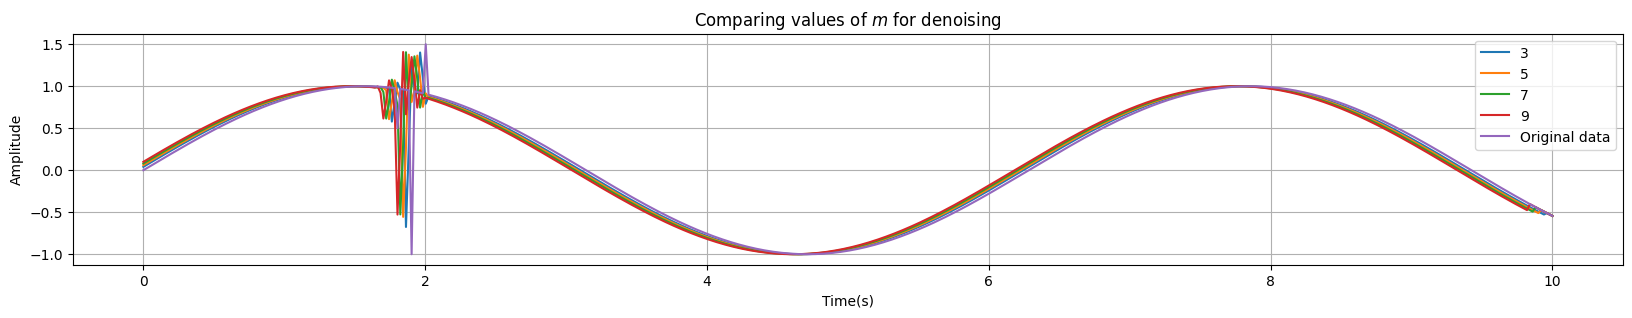

In [21]:
fig=plt.figure(figsize=(20,3))
for i in range(1,5):
    plt.plot(t,savgol(data,(2*i+1)),label=(2*i+1))
plt.plot(t,data,label='Original data')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Comparing values of $m$ for denoising')
plt.grid()

EMD - Hilbert-Huang Tranform 

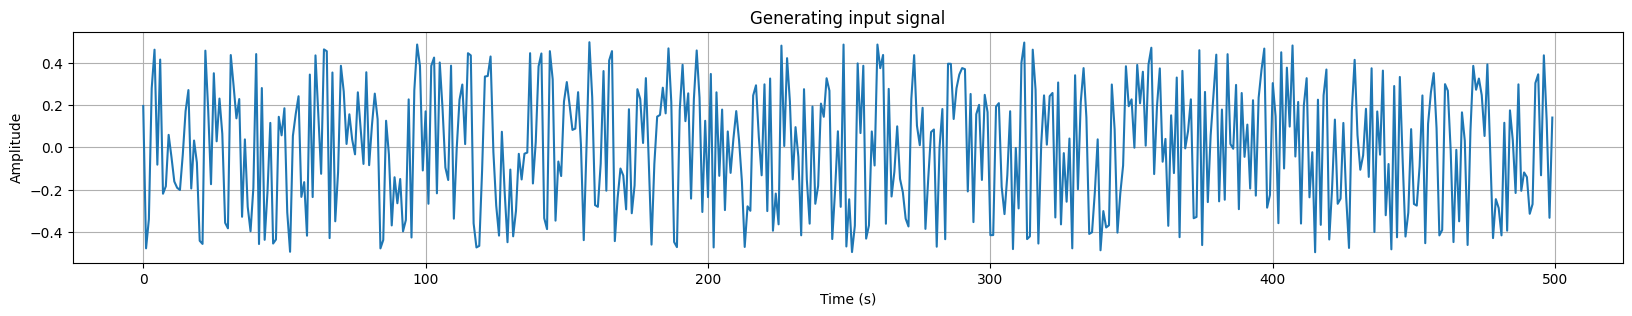

In [4]:
rand_data=1*(np.random.rand(500)-0.5)
time=np.arange(0,500,1)
fig=plt.figure(figsize=(20,3))
plt.plot(time,rand_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generating input signal')
plt.grid()

In [31]:
print(hht_denoise.__doc__)

Calculates the Hilbert-Huang Transform for any input function to denoise any signal
    
    Parameters:
    ----------
    x         : input amplitudes of time series data
    t         : corresponding time values of the time-series data
    threshold : threshold of s.d. acceptable for denoising
    
    Returns:
    -------
    x_ : returns the denoised signal
    


In [32]:
print(envelope.__doc__)

Creates the envelope of any function (upper as well as lower as per user input) using cubic spline interpolation
    
    Parameters:
    ----------
    x    : input amplitude values of any time-series signal
    t    : input time values for corresponding data values
    kind : takes 'upper' and 'lower' to give the upper and lower envelopes
    
    Returns:
    -------
    y : gives the envelope as per user inputs
    


Without removal of any edge effects:

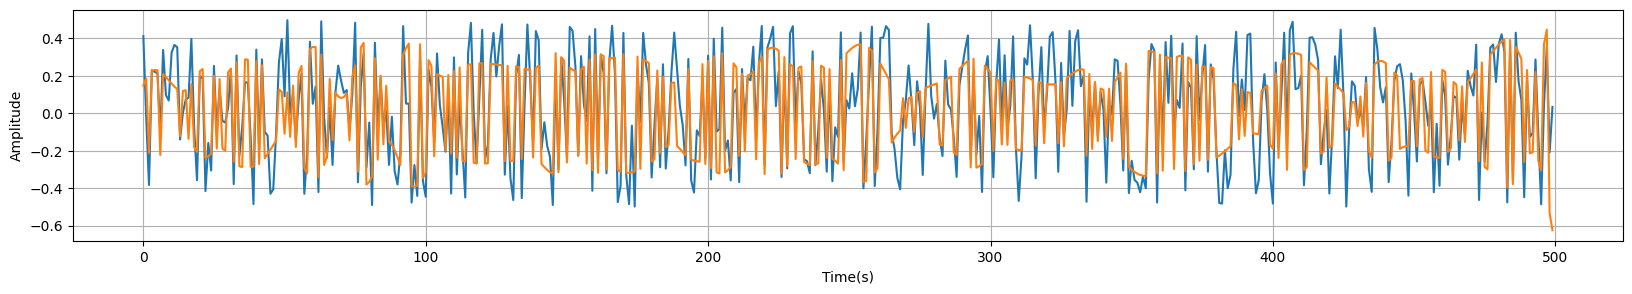

In [21]:
fig=plt.figure(figsize=(20,3))
plt.plot(time,rand_data,label='Original data')
plt.plot(time,hht_denoise(rand_data,time),label='Denoised data')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

Removing edge effects:

In [33]:
print(rem_edge_effects.__doc__)

Removes the edge effects caused by cubic spline interpolation caused due to imperfect maxima-minima calculation during envelope creation
    
    Parameters:
    ----------
    x : denoised signal data
    y : original signal data
    
    Returns:
    -------
    x_ : removes edge effects from the denoised signal
    


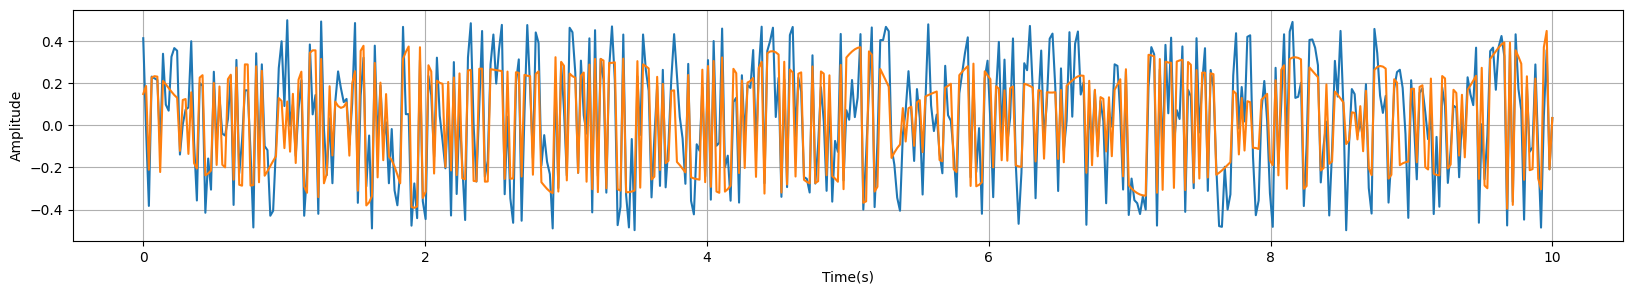

In [22]:
fig=plt.figure(figsize=(20,3))
plt.plot(t,rand_data)
plt.plot(t,rem_edge_effects(hht_denoise(rand_data,t),rand_data))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

Comparing various threshold values:

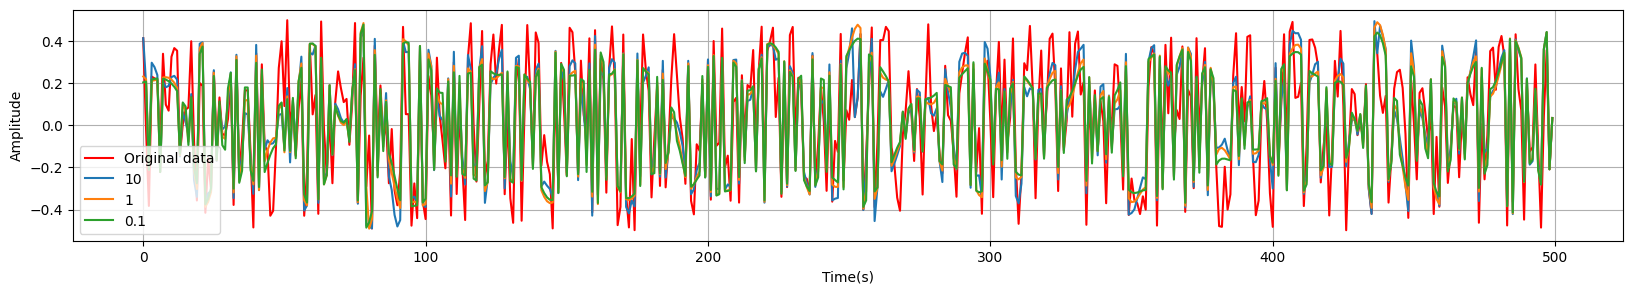

In [30]:
fig=plt.figure(figsize=(20,3))
plt.plot(time,rand_data,label='Original data',color='red')
for i in range(3):
    plt.plot(time,rem_edge_effects(hht_denoise(rand_data,time,10**(-i+1)),rand_data),label=10**(-i+1))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()